<a id='banner-image'></a>

<img src='./images/titanic_banner.jpg'>

# Titanic: Machine Learning from Disaster

**Shaun Chua**
<br> 20 August 2020

---

## Contents:
[**1. Importing Libraries**](#1)
<br> [**2. Importing Dataset**](#2)
<br> [**3. EDA and Data Cleaning** ](#3)
<br> &emsp;[3.1 Imputation for Missing Data](#3.1)
<br> [**4. Feature Engineering**](#4)
<br> [**5. Preprocessing**](#5)
<br> [**6. Modelling**](#6)
<br> [**7. Results and Discussion**](#7)
<br> [**8. Kaggle Submission**](#8)
<br> [**9. Credits**](#9)

 <a id='1'></a> 

# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import iplot#,plot download_plotlyjs, init_notebook_mode, 
import cufflinks as cf
cf.go_offline()

import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# To ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# To get notebook runtime
import time

%matplotlib inline

In [2]:
# Defining function to look at datasets

def preview(dataframe):
    dataframe_name = [x for x in globals() if globals()[x] is dataframe][0]
    print(f'"{dataframe_name}" has shape: {dataframe.shape}.')
    
    print("")
    print(f'"{dataframe_name}" has the following columns:')
    display(dataframe.columns)
    
    print("\n")
    print(f'These are the top 5 rows of "{dataframe_name}":')
    display(dataframe.head())

    print("\n")
    print(f'These are the bottom 5 rows of "{dataframe_name}":')
    display(dataframe.tail())
    
    print('\n')
    print(f'This is a summary of "{dataframe_name}":')
    print('-----------------------------------------')
    display(dataframe.info())
    
    print('\n')
    print(f'Below are descriptive statistics for numerical features in "{dataframe_name}":')
    display(train.describe())
    
    print('\n')
    print(f'Below are descriptive statistics for categorical features in "{dataframe_name}":')
    display(train.describe(include='O'))
    
    print("\n")
    nulls = dataframe.isnull().sum().sort_values(ascending=False)
    total_nulls = dataframe.isnull().sum().sum()
    if total_nulls > 0:
        print(f'"{dataframe_name}" has a total {total_nulls} of nulls.')
        print("\n")
        print(f'The columns in "{dataframe_name}" with nulls are: {list(nulls[nulls>0].index)}') 
      
        print("\n")
        print(f'The variables with nulls in "{dataframe_name}" are:')
        display(nulls)

        print("\n")
        print(f'The top 5 variables in "{dataframe_name}" with the highest percentage of missing values are:')
        display(dataframe.isnull().mean().sort_values(ascending=False)[:5])

    else:
        print(f'"{dataframe_name}" does not contain nulls.')

In [3]:
# Defining Function to Check for Status of Imputation

def imputation_checker(dataframe):
    dataframe_name = [x for x in globals() if globals()[x] is dataframe][0]
    if dataframe.isnull().sum().sum() == 0:
        print('Imputation Completed')
        print('--------------------------------------------------------')
        print(f'There are {dataframe.isnull().sum().sum()} missing values remaining in "{dataframe_name}".')
        print(f'If "{dataframe_name}" is a combination of the train and test set, remember to split them via the "xs" function.')

    else: 
        print('Imputation Incomplete')
        print('----------------------------------------------------------')
        print(f'There are still {dataframe.isnull().sum().sum()} missing values remaining in "{dataframe_name}".')
        print('\n')
        for x in dataframe.columns:
            if dataframe[x].isnull().sum() != 0:
                if dataframe[x].isnull().sum() == dataframe.isnull().sum().sum():
                    print(f'All of the missing values are from the feature: "{x}".')

                elif dataframe[x].isnull().sum() == 1:
                    print(f'{dataframe[x].isnull().sum()} of them is from the feature: "{x}".')

                else:
                    print(f'{dataframe[x].isnull().sum()} of them are from the feature: "{x}".')

In [4]:
# Starting timer for notebook

t0 = time.time()

<a id='2'></a>

# 2. Importing Datasets

Dataset for this project was taken from the <a href='https://www.kaggle.com/c/titanic/data'>Titanic: Machine Learning from Disaster</a> Kaggle Challenge.

In [5]:
# Loading datasets

train = pd.read_csv('./datasets/titanic_train.csv')
test = pd.read_csv('./datasets/titanic_test.csv')

<a id='3'></a>

# 3. EDA and Data Cleaning

In [6]:
preview(train)

"train" has shape: (891, 12).

"train" has the following columns:


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')



These are the top 5 rows of "train":


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




These are the bottom 5 rows of "train":


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q




This is a summary of "train":
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None



Below are descriptive statistics for numerical features in "train":


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




Below are descriptive statistics for categorical features in "train":


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pernot, Mr. Rene",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644




"train" has a total 866 of nulls.


The columns in "train" with nulls are: ['Cabin', 'Age', 'Embarked']


The variables with nulls in "train" are:


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64



The top 5 variables in "train" with the highest percentage of missing values are:


Cabin       0.771044
Age         0.198653
Embarked    0.002245
Fare        0.000000
Ticket      0.000000
dtype: float64

In [7]:
preview(test)

"test" has shape: (418, 11).

"test" has the following columns:


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')



These are the top 5 rows of "test":


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




These are the bottom 5 rows of "test":


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C




This is a summary of "test":
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None



Below are descriptive statistics for numerical features in "test":


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




Below are descriptive statistics for categorical features in "test":


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pernot, Mr. Rene",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644




"test" has a total 414 of nulls.


The columns in "test" with nulls are: ['Cabin', 'Age', 'Fare']


The variables with nulls in "test" are:


Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64



The top 5 variables in "test" with the highest percentage of missing values are:


Cabin       0.782297
Age         0.205742
Fare        0.002392
Embarked    0.000000
Ticket      0.000000
dtype: float64

### **Comments:**
---

Most of the data looks complete. One feature in particular, `Cabin`, seems to have an huge proportion of data that is missing. 

I'll proceed with some basic data visualisation before dealing with the missing values.

## Visualising Missing Values

Text(0.5, 1.0, 'Missing Values in Train Set')

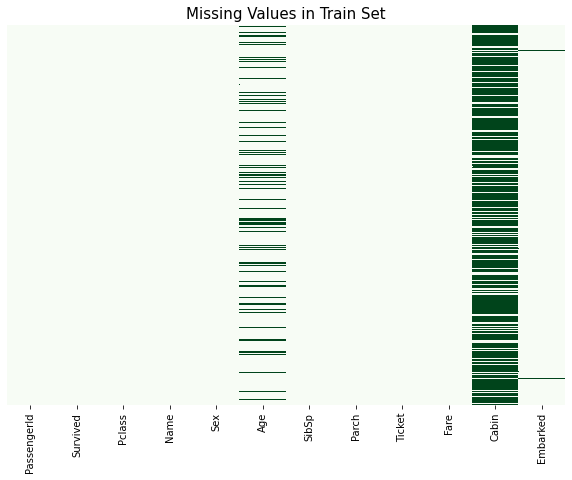

In [8]:
# Visualising for Train Set

fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(train.isnull(), cmap='Greens', yticklabels=False, cbar=False)

display(ax.set_title('Missing Values in Train Set', fontsize=15))

Text(0.5, 1.0, 'Missing Values in Test Set')

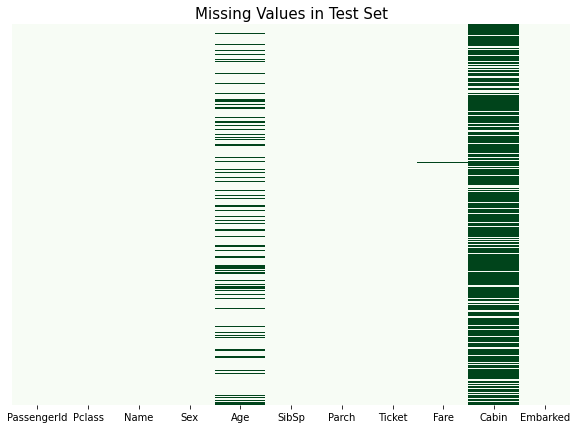

In [9]:
# Visualising for Test Set

fig, ax = plt.subplots(figsize=(10,7))

sns.heatmap(test.isnull(), cmap='Greens', yticklabels=False, cbar=False)

display(ax.set_title('Missing Values in Test Set', fontsize=15))

### Comments:
___
Both heatmaps reflect missing values that are consistent with the preview of `train` and `test`. 

One point to note is that there are missing values for `Fare` only in the test set, while there are missing values for `Embarked` only in the train set.

I will deal with the missing values later, for now I will continue some visualisation.

In [10]:
# Visualising Survival Rate

data = go.Bar(x=['Survived', 'Did not Survive'],
              y=[sum(train['Survived']==1), sum(train['Survived']==0)],
              marker={'color':'green'})

layout = go.Layout(title = 'Titanic Passenger Survival',
                   title_x = 0.5,
                   yaxis = {'title':'No. of Pasengers'},
                   #height = 520,
                   #width = 780,
                   autosize=True)

fig = go.Figure(data=[data], layout=layout)

iplot(fig, show_link=True)

### Comments:
___
Generally, it would appear that more people did not survive. 

## Visualising Survival by Gender

In [11]:
# Female Survival Count

print(train[train['Sex']=='female'].groupby('Survived').count()['Sex'])

Survived
0     81
1    233
Name: Sex, dtype: int64


In [12]:
# Male Survival Count

print(train[train['Sex']=='male'].groupby('Survived').count()['Sex'])

Survived
0    468
1    109
Name: Sex, dtype: int64


In [13]:
# Visualising Gender Surival by Gender

fig = go.Figure(data=[go.Bar(name='Male',
                             x=['Did not Survive', 'Survived'],
                             y=train[train['Sex']=='male'].groupby('Survived').count()['Sex']),
                      go.Bar(name='Female', 
                             x=['Did not Survive', 'Survived'], 
                             y=train[train['Sex']=='female'].groupby('Survived').count()['Sex'])],
                
                layout=go.Layout(title = 'Titanic Passenger Survival by Gender',
                                 title_x = 0.5,
                                 title_y = 0.88,
                                 colorway=('DarkBlue', 'Crimson'),
                                 autosize=True))

fig.update_layout(barmode='group')
iplot(fig, show_link=True)

In [14]:
# # Passengers who did not Survive

# print(train[train['Survived']==0].groupby('Sex').count()['Survived'])

In [15]:
# # Passengers who Survived

# print(train[train['Survived']==1].groupby('Sex').count()['Survived'])

In [16]:
# Visualising Gender by Survival

# fig = go.Figure(data=[go.Bar(name='Did not Survive', 
#                              x=['Female', 'Male'], 
#                              y=train[train['Survived']==0].groupby('Sex').count()['Survived']),
#                       go.Bar(name='Survived',
#                              x=['Female', 'Male'],
#                              y=train[train['Survived']==1].groupby('Sex').count()['Survived'])],
                
#                 layout=dict(title='Titanic Passenger Gender by Survival',
#                             title_x = 0.46,
#                             title_y = 0.88,
#                             colorway=('Crimson', 'Limegreen'))
#                )

# fig.update_layout(barmode='group')
# fig

### Comments:
___
It looks as though there is a greater proportion of `Males` who did not survive, than `Females` who did not survive.

## Visualising Survival by Passenger Class 

In [17]:
# Pclass 1 passenger survival

print(train[train['Pclass'] == 1].groupby('Survived').count()['Pclass'])

Survived
0     80
1    136
Name: Pclass, dtype: int64


In [18]:
# Pclass 2 passenger survival

print(train[train['Pclass'] == 2].groupby('Survived').count()['Pclass'])

Survived
0    97
1    87
Name: Pclass, dtype: int64


In [19]:
# Pclass 3 passenger survival

print(train[train['Pclass'] == 3].groupby('Survived').count()['Pclass'])

Survived
0    372
1    119
Name: Pclass, dtype: int64


In [20]:
# Visualising passnger survival by PClass

data = [go.Bar(name='1st Class',
               x = ['Did not Surive', 'Survived'],
               y = train[train['Pclass']==1].groupby('Survived').count()['Pclass']),
            
       go.Bar(name = '2nd Class',
               x = ['Did not Surive', 'Survived'],
               y = train[train['Pclass']==2].groupby('Survived').count()['Pclass']),
              
       go.Bar(name = '3rd Class',
               x = ['Did not Surive', 'Survived'],
               y = train[train['Pclass']==3].groupby('Survived').count()['Pclass'])]

layout = dict(title = 'Titanic Passenger Survival by Passenger Class',
              title_x = 0.5,
              title_y = 0.88,
              colorway=('LimeGreen', 'DarkBlue', 'Crimson'))

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=True)

In [21]:
# Passengers who did not survive in all Classes

print(train[train['Survived']==0].groupby(by='Pclass').count()['Survived'])

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64


In [22]:
# Pasengers who survived in all Classes

print(train[train['Survived']==1].groupby(by='Pclass').count()['Survived'])

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [23]:
# Visualising Passenger Class by Survival 

data = [go.Bar(name = 'Did not Survive', 
               x = ['1st Class', '2nd Class', '3rd Class'],
              #x = sorted(list(train['Pclass'].unique()), reverse=False),
              y = train[train['Survived']==0].groupby(by='Pclass').count()['Survived']),
        
       go.Bar(name = 'Survived',
              x = ['1st Class', '2nd Class', '3rd Class'],
              #x = sorted(list(train['Pclass'].unique()), reverse=False),
              y = train[train['Survived']==1].groupby(by='Pclass').count()['Survived'])]

layout = dict(title ='Titanic Passenger Class by Survival',
              title_x = 0.46,
              title_y = 0.88,
              colorway=('Crimson', 'LimeGreen'))

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=True)

### Comments:
___
From both the plots, it is evident that the bulk of the passengers who survived belonged to 1st Class. 

Of the passengers who survived, there were more who came from 3rd Class than those who came from 2nd Class. That was because there were a lot of passengers who came from 3rd Class.

## Visualising Survival by Age

In [24]:
# Ages of passengers who survived

print(train[train['Survived']==1]['Age'])

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64


In [25]:
# Ages of passengers who did not survive

print(train[train['Survived']==0]['Age'])

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64


In [26]:
# Visualising survival by age

data = [go.Histogram(name = 'Did not Survive',
                     x = train[train['Survived']==0]['Age'],
                     nbinsx = 10),
        
        go.Histogram(name = 'Survived',
                     x = train[train['Survived']==1]['Age'],
                     nbinsx = 10)]

layout = dict(title = 'Titanic Passenger Survival by Age',
              title_x = 0.46,
              title_y = 0.88,
              colorway = ('Crimson', 'Limegreen'),
              autosize=True)

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=True)

### Comments:
___
Generally, it would appear that for each age group, exceptionally more people did not survive than did survive. 

The exceptions are the extreme age groups, such as <20 and >70.

I'll now proceed to clean the data by resolving the missing values.

<a id='3.1'></a>

## Imputation for Missing Data

In [27]:
# Combining train set and test set for cleaning

combined = pd.concat([train, test], keys=['Train', 'Test'])

In [28]:
# Checking combined

display(combined)

PassengerId  Survived  Pclass  \
Train 0              1       0.0       3   
      1              2       1.0       1   
      2              3       1.0       3   
      3              4       1.0       1   
      4              5       0.0       3   
...                ...       ...     ...   
Test  413         1305       NaN       3   
      414         1306       NaN       1   
      415         1307       NaN       3   
      416         1308       NaN       3   
      417         1309       NaN       3   

                                                        Name     Sex   Age  \
Train 0                              Braund, Mr. Owen Harris    male  22.0   
      1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
      2                               Heikkinen, Miss. Laina  female  26.0   
      3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
      4                             Allen, Mr. William Henry    male  35.0   
...                                                      ...     ...   ...   
Test  413                                 Spector, Mr. Woolf    male   NaN   
      414                       Oliva y Ocana, Dona. Fermina  female  39.0   
      415                       Saether, Mr. Simon Sivertsen    male  38.5   
      416                                Ware, Mr. Frederick    male   NaN   
      417                           Peter, Master. Michael J    male   NaN   

           SibSp  Parch              Ticket      Fare Cabin Embarked  
Train 0        1      0           A/5 21171    7.2500   NaN        S  
      1        1      0            PC 17599   71.2833   C85        C  
      2        0      0    STON/O2. 3101282    7.9250   NaN        S  
      3        1      0              113803   53.1000  C123        S  
      4        0      0              373450    8.0500   NaN        S  
...          ...    ...                 ...       ...   ...      ...  
Test  413      0      0           A.5. 3236    8.0500   NaN        S  
      414      0      0            PC 17758  108.9000  C105        C  
      415      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
      416      0      0              359309    8.0500   NaN        S  
      417      1      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]

In [29]:
# Getting features with missing values 

print(combined.isnull().sum().sort_values(ascending=False))

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64


### Comments:
___
There are a lot of missing values for `Survived` because that is the test set, which is unlabelled. 

The true missing values are `Cabin`, `Age`, `Embarked`, and `Fare`.

I'll begin with `Cabin`. 

* It is possible that the missing values for Cabin indicates that those passengers did not have accomodation in a Cabin
* Perhaps those with cabin accomodation belonged to the wealthier class, and therefore had a higher chance of surviving as they may have been given priority for the lifeboats 
* I will impute `0` for observations missing a cabin, and `1` for observations with a cabin

## Imputation for `Cabin`

In [30]:
# Defining function for Cabin imputation

def cabin_imputer(obs):
    if pd.isnull(obs):
        return 0
    
    else:
        return 1

In [31]:
# Applying cabin_imputer to Cabin for train set and test set 

combined['Cabin'] = combined['Cabin'].apply(cabin_imputer)

In [32]:
# Checking for nulls in Cabin

print(combined['Cabin'].isnull().sum())

0


### Comments:
___
Imputation for `Cabin` successful, I will now proceed to impute for `Age`. 

##### Imputation for Age by Pclass

I will attempt to impute ages based on Pclass. 

Most likely, passengers in Pclass 1 might be older. 

Purchasing a ticket for 1st Class might indicate that the passenger is wealthy enough to afford it. Accordingly, it may also suggest that the passenger is older, since it generally takes some time for one to accumulate wealth to be wealthy. 

##### Imputation for Age using Median
I will use the median value of the age in each class for imputation. This is to avoid outliers affecting imputation via mean (a very very young person in 1st Class or a very very elderly passenger in 3rd Class)

**Note:** 
* Only information from the **training set** will be used for `Age` imputation

## Imputation for `Age`

In [33]:
# Median age for passengers in 1st Class

print(train[train['Pclass']==1]['Age'].median())

37.0


In [34]:
# Median age for passengers in 2nd Class

print(train[train['Pclass']==2]['Age'].median())

29.0


In [35]:
# Median age for passengers in 3rd Class

print(train[train['Pclass']==3]['Age'].median())

24.0


In [36]:
# Defining function for age imputation

def age_imputer(obs):
    pclass = obs[0]
    age = obs[1]
    
    if pd.isnull(age):

        if pclass == 1:
            return train[train['Pclass']==1]['Age'].median()

        elif pclass == 2:
            return train[train['Pclass']==2]['Age'].median()

        else:
            return train[train['Pclass']==3]['Age'].median()
        
    else:
        return age

In [37]:
# Applying age_imputer to Age for train set and test set

combined['Age'] = combined[['Pclass', 'Age']].apply(age_imputer, axis=1)

In [38]:
# Checking for nulls in Age

print(combined['Age'].isnull().sum())

0


In [39]:
# Checking status of imputation

imputation_checker(combined)

Imputation Incomplete
----------------------------------------------------------
There are still 421 missing values remaining in "combined".


418 of them are from the feature: "Survived".
1 of them is from the feature: "Fare".
2 of them are from the feature: "Embarked".


### Comments:
___
Imputation for `Age` successful, I will now proceed to handle missing data for `Embarked`. 

Since there is no way I will know what to impute for `Embarked`, I have decided to drop these rows

## Dropping Rows with Missing `Embarked` Data

In [40]:
# Dropping rows with missing data in Embarked

combined.dropna(subset=['Embarked'], inplace=True)

In [41]:
# Checking for nulls in Embarked

combined['Embarked'].isnull().sum()

0

### Comments:
___
Rows successfully dropped for `Embarked`, I will now proceed to handle missing data for `Fare`. 

##### Imputation for Fare by Pclass
Since fares are likely to differ between Pclass, I will impute a suitable value for `Fare` by referring to Pclass.

##### Imputation for Fare using Median
In case fares within Pclass differ greatly, I will use the mode for imputation, to impute the most common fare for missing values of fare.

**Note:** 
* Only information from the **training set** will be used for `Age` imputation

## Imputation for `Fare`

In [42]:
# Mode and Median for Fare in 1st Class  

print(f"Mode for fare in 1st Class is: {train[train['Pclass']==1]['Fare'].mode()[0]}.")
print(f"Median for fare in 1st Class is: {train[train['Pclass']==1]['Fare'].median():.2f}.")

Mode for fare in 1st Class is: 26.55.
Median for fare in 1st Class is: 60.29.


In [43]:
# Mode and Median for Fare in 2nd Class

print(f"Mode for fare in 2nd Class is: {train[train['Pclass']==2]['Fare'].mode()[0]}.")
print(f"Median for fare in 2nd Class is: {train[train['Pclass']==2]['Fare'].median()}.")

Mode for fare in 2nd Class is: 13.0.
Median for fare in 2nd Class is: 14.25.


In [44]:
# Mode and Median for Fare in 3rd Class

print(f"Mode for fare in 3rd Class is :{train[train['Pclass']==3]['Fare'].mode()[0]}.")
print(f"Median for fare in 3rd Class is: {train[train['Pclass']==3]['Fare'].median()}.")

Mode for fare in 3rd Class is :8.05.
Median for fare in 3rd Class is: 8.05.


In [45]:
# Defining function for Fare imputation

def fare_imputer(obs):
    pclass = obs[0]
    fare = obs[1]
    
    if pd.isnull(fare):
        if pclass == 1:
            return train[train['Pclass']==1]['Fare'].mode()
        
        elif pclass == 2:
            return train[train['Pclass']==2]['Fare'].mode()
        
        else:
            return train[train['Pclass']==3]['Fare'].mode()
    
    else:
        return fare
        

In [46]:
# Applying fare_imputer to Fare for train set and test set

combined['Fare'] = combined[['Pclass', 'Fare']].apply(fare_imputer, axis=1)

In [47]:
# Checking for nulls in Fare

combined['Fare'].isnull().sum()

0

In [48]:
# Checking status of imputation

imputation_checker(combined)

Imputation Incomplete
----------------------------------------------------------
There are still 418 missing values remaining in "combined".


All of the missing values are from the feature: "Survived".


### Comments:
___

Imputation is actually completed, because all the 'missing values' actually belong to the unlabelled test set. 

I will now proceed with some feature engineering.

<a id ='4'></a>

# 4. Feature Engineering

### Comments:
___
It would appear that passengers tend to have a salutation or title in their names.

If all passengers indeed have a title, then we can use the title to try and distinguish the characteristics of that passenger. For instance, was he/she a servicemen, or was he/she of noble descent. 

There is a good chance that a passenger's survival also depends on his/her background. For example, a servicemen may prioritise allowing civilian to board lifeboat before himself/herself.

Thus, it may be useful to create a feature called 'Title'.

**Note:** 
* Only information from the **training set** will be used for `Age` imputation

## Creating `Title` Feature

In [49]:
# Getting the various titles of passengers

titles = []

for name in train['Name']:
    titles.append(name.split(',')[1].split('.')[0].strip())

In [50]:
# Getting unique titles

set(titles)

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

### Comments:

<a href='https://www.nobility-royalty.com/id84.htm'> This link</a> will be the main reference for the title map below.

In [51]:
# Creating title map

title_map = {'Capt':'Servicemen',
             'Col':'Servicemen',
             'Don':'Noble',
             'Dr':'Servicemen',
             'Jonkheer':'Noble',
             'Lady':'Noble',
             'Major':'Servicemen',
             'Master':'Master',
             'Miss':'Miss',
             'Mlle':'Miss',
             'Mme':'Mrs',
             'Mr':'Mr',
             'Mrs':'Mrs',
             'Ms':'Miss',
             'Rev':'Clergy',
             'Sir':'Royalty',
             'the Countess':'Royalty'}

In [52]:
# Creating Title Column before applying map

combined['Title'] = combined['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
#type(combined['Name'].map(lambda x:x.split(',')[1].split('.')[0]))

In [53]:
# Applying title_map to Title column

combined['Title'] = combined['Title'].map(title_map)

In [54]:
# Checking if mapping was successful

print(combined['Title'].isnull().sum())

1


### Comments:
___
It looks like one title was unsuccessfully mapped, perhaps it was a unique title in the test set, not found in the training set. 

In [55]:
# Checking for unsuccessfully mapped title

display(combined[combined['Title'].isnull()])

,,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
Test,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,1,C,NaN


In [56]:
# Manually assigning row a Title

combined['Title'].iloc[1303] = 'Noble'

In [57]:
# Checking if title was succesfully assigned

print(combined['Title'].isnull().sum())

0


In [58]:
# Dropping Name column since Title Column has been engineered

combined.drop(columns=['Name'], inplace=True)

### Comments:
___
`Title` feature successfully created. 

I'll another feature called `FamilySize`, which is the sum of `SibSp` and `Parch`.

## Creating `FamilySize` feature

In [59]:
# Summing SibSp, Parch, and +1 for the passenger himself/herself

combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1

In [60]:
# Dropping SibSP and Parch since FamilySize captures that information

combined.drop(columns=['SibSp', 'Parch'], inplace=True)

In [61]:
# Checking if columns were engineered and dropped succesfully

print(combined.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title', 'FamilySize'],
      dtype='object')


### Comments:
___
`FamilySize` feature successfully created. 

I'll create one final feature called `TicketHeader`, which attempts to gain insight from the `Tickets` feature.

It appears that some tickets have headers, or prefixes, while some do not. This difference may be useful to tell if one survived or not. 

## Creating `TicketHeader` Feature

In [62]:
# Looking at tickets

combined['Ticket'].head(50)

Train  0            A/5 21171
       1             PC 17599
       2     STON/O2. 3101282
       3               113803
       4               373450
       5               330877
       6                17463
       7               349909
       8               347742
       9               237736
       10             PP 9549
       11              113783
       12           A/5. 2151
       13              347082
       14              350406
       15              248706
       16              382652
       17              244373
       18              345763
       19                2649
       20              239865
       21              248698
       22              330923
       23              113788
       24              349909
       25              347077
       26                2631
       27               19950
       28              330959
       29              349216
       30            PC 17601
       31            PC 17569
       32              335677
       33 

In [63]:
# Defining function to clean tickets

def ticket_cleaner(ticket):
    ticket = ticket.replace('.','').replace('/','').split()
    ticket = ticket[0].strip()
    # Checking if ticket is a digit or not, if it is, return 'nil' 
    if ticket.isdigit():
        return 'nil'

    else:
        return ticket 

In [64]:
# Creating TicketHeader column by applying ticket cleaner to Ticket column

combined['TicketHeader'] = combined['Ticket'].apply(ticket_cleaner)

In [65]:
# Checking TicketHeader

combined['TicketHeader'].value_counts()

nil        955
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
C            8
SOC          8
STONO2       7
SOPP         7
SCParis      5
SCAH         5
LINE         4
WEP          4
PP           4
SOTONO2      3
FC           3
SWPP         2
SC           2
SCA4         2
PPP          2
SCOW         1
CASOTON      1
A            1
SCA3         1
SOP          1
STONOQ       1
AQ4          1
SP           1
AS           1
LP           1
AQ3          1
Fa           1
Name: TicketHeader, dtype: int64

In [66]:
# Checking if there are any missing values in TickerHeader

combined['TicketHeader'].isnull().sum()

0

In [67]:
# Dropping Ticket column

combined.drop(columns=['Ticket'], inplace=True)

### Comments:

`TickerHeader` feature successfully engineered.

I will now move on to preprocessing, by first encoding the categorical features via One-Hot Encoding.

<a id='5'></a>

# 5. Preprocessing

In [68]:
# Checking combined

display(combined.head())

PassengerId  Survived  Pclass     Sex   Age     Fare  Cabin Embarked  \
Train 0            1       0.0       3    male  22.0     7.25      0        S   
      1            2       1.0       1  female  38.0  71.2833      1        C   
      2            3       1.0       3  female  26.0    7.925      0        S   
      3            4       1.0       1  female  35.0     53.1      1        S   
      4            5       0.0       3    male  35.0     8.05      0        S   

        Title  FamilySize TicketHeader  
Train 0    Mr           2           A5  
      1   Mrs           2           PC  
      2  Miss           1       STONO2  
      3   Mrs           2          nil  
      4    Mr           1          nil

In [69]:
# Getting features to encode

feats_to_encode =['Pclass',
                  'Sex',
                  'Embarked',
                  'Title',
                  'FamilySize',
                  'TicketHeader']

In [70]:
# Using Pandas' get_dummies as One-Hot Encoder

combined = pd.get_dummies(combined, columns=feats_to_encode, prefix=feats_to_encode, drop_first=True)

In [71]:
# # get_dummies only drop_first on Sex

# combined = pd.get_dummies(combined, columns=['Pclass', 'Embarked', 'Title', 'FamilySize', 'TicketHeader'], prefix=['Pclass', 'Embarked', 'Title', 'FamilySize', 'TicketHeader'])
# combined = pd.get_dummies(combined, columns=['Sex'], drop_first=True)

In [72]:
combined.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Cabin', 'Pclass_2',
       'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Noble', 'Title_Royalty',
       'Title_Servicemen', 'FamilySize_2', 'FamilySize_3', 'FamilySize_4',
       'FamilySize_5', 'FamilySize_6', 'FamilySize_7', 'FamilySize_8',
       'FamilySize_11', 'TicketHeader_A4', 'TicketHeader_A5',
       'TicketHeader_AQ3', 'TicketHeader_AQ4', 'TicketHeader_AS',
       'TicketHeader_C', 'TicketHeader_CA', 'TicketHeader_CASOTON',
       'TicketHeader_FC', 'TicketHeader_FCC', 'TicketHeader_Fa',
       'TicketHeader_LINE', 'TicketHeader_LP', 'TicketHeader_PC',
       'TicketHeader_PP', 'TicketHeader_PPP', 'TicketHeader_SC',
       'TicketHeader_SCA3', 'TicketHeader_SCA4', 'TicketHeader_SCAH',
       'TicketHeader_SCOW', 'TicketHeader_SCPARIS', 'TicketHeader_SCParis',
       'TicketHeader_SOC', 'TicketHeader_SOP', 'TicketHeader_SOPP',
       'TicketHeader_SOTO

### Comments:
___
Encoding successful, dropping `PassengerId` since it does not seem to provide meaningful insight for the model

## Dropping `PassengerId`

In [73]:
# Dropping PassengerId

combined.drop(columns=['PassengerId'], inplace=True)

In [74]:
# Checking if PassengerId was dropped successfully

print(combined.columns)

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Noble', 'Title_Royalty', 'Title_Servicemen',
       'FamilySize_2', 'FamilySize_3', 'FamilySize_4', 'FamilySize_5',
       'FamilySize_6', 'FamilySize_7', 'FamilySize_8', 'FamilySize_11',
       'TicketHeader_A4', 'TicketHeader_A5', 'TicketHeader_AQ3',
       'TicketHeader_AQ4', 'TicketHeader_AS', 'TicketHeader_C',
       'TicketHeader_CA', 'TicketHeader_CASOTON', 'TicketHeader_FC',
       'TicketHeader_FCC', 'TicketHeader_Fa', 'TicketHeader_LINE',
       'TicketHeader_LP', 'TicketHeader_PC', 'TicketHeader_PP',
       'TicketHeader_PPP', 'TicketHeader_SC', 'TicketHeader_SCA3',
       'TicketHeader_SCA4', 'TicketHeader_SCAH', 'TicketHeader_SCOW',
       'TicketHeader_SCPARIS', 'TicketHeader_SCParis', 'TicketHeader_SOC',
       'TicketHeader_SOP', 'TicketHeader_SOPP', 'TicketHeader_SOTONO2',
       'TicketHe

In [75]:
# Sorting columns alphabetically

combined = combined.reindex(sorted(combined.columns), axis=1)

In [76]:
# Shifting 'Survived' to end of DF

combined = combined.drop(columns=['Survived']).assign(Survived=combined['Survived'])

In [77]:
# Viewing combined one last time

display(combined.head())

Age  Cabin  Embarked_Q  Embarked_S  FamilySize_11  FamilySize_2  \
Train 0  22.0      0           0           1              0             1   
      1  38.0      1           0           0              0             1   
      2  26.0      0           0           1              0             0   
      3  35.0      1           0           1              0             1   
      4  35.0      0           0           1              0             0   

         FamilySize_3  FamilySize_4  FamilySize_5  FamilySize_6  ...  \
Train 0             0             0             0             0  ...   
      1             0             0             0             0  ...   
      2             0             0             0             0  ...   
      3             0             0             0             0  ...   
      4             0             0             0             0  ...   

         TicketHeader_WEP  TicketHeader_nil Title_Master  Title_Miss  \
Train 0                 0                 0            0           0   
      1                 0                 0            0           0   
      2                 0                 0            0           1   
      3                 0                 1            0           0   
      4                 0                 1            0           0   

         Title_Mr  Title_Mrs  Title_Noble  Title_Royalty  Title_Servicemen  \
Train 0         1          0            0              0                 0   
      1         0          1            0              0                 0   
      2         0          0            0              0                 0   
      3         0          1            0              0                 0   
      4         1          0            0              0                 0   

         Survived  
Train 0       0.0  
      1       1.0  
      2       1.0  
      3       1.0  
      4       0.0  

[5 rows x 60 columns]

### Comments:
___
Data is now ready, I will split it back into the `train` and `test` sets.

## Splitting Combined into `test` and `train`

In [78]:
# Splitting combined_encoded to get back encoded train and test set using Cross Section
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html

train_cleaned, test_cleaned = combined.xs('Train'), combined.xs('Test')

In [79]:
# Checking train

display(train_cleaned)

,Age,Cabin,Embarked_Q,Embarked_S,FamilySize_11,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,...,TicketHeader_WEP,TicketHeader_nil,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Royalty,Title_Servicemen,Survived
0,22.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
1,38.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
2,26.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
3,35.0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1.0
4,35.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
887,19.0,1,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1.0
888,24.0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.0
889,26.0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1.0


In [80]:
# Checking test, dropping 'Survived'
# When I combined them, 'Survived' column was filled with NaNs for test, since test doesnt come with 'SalePrice'

test_cleaned.drop(columns=['Survived'], inplace=True)

In [81]:
# Checking test

display(test_cleaned)

,Age,Cabin,Embarked_Q,Embarked_S,FamilySize_11,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,...,TicketHeader_WC,TicketHeader_WEP,TicketHeader_nil,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Royalty,Title_Servicemen
0,34.5,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,47.0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,62.0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,27.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,22.0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,24.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
414,39.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
415,38.5,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
416,24.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


### Comments:
---

Split successful, I will now proceed to prepare the data for modelling.

In [82]:
#Saving finalised datasets to csv

#train_cleaned.to_csv('./datasets/titanic_train_cleaned.csv', index=False)
#test_cleaned.to_csv('./datasets/titanic_test_cleaned.csv', index=False)

## Setting Features and Target

In [83]:
# Getting List of Features

features = [x for x in train_cleaned.columns if x not in 'Survived']
print(features)

['Age', 'Cabin', 'Embarked_Q', 'Embarked_S', 'FamilySize_11', 'FamilySize_2', 'FamilySize_3', 'FamilySize_4', 'FamilySize_5', 'FamilySize_6', 'FamilySize_7', 'FamilySize_8', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'TicketHeader_A4', 'TicketHeader_A5', 'TicketHeader_AQ3', 'TicketHeader_AQ4', 'TicketHeader_AS', 'TicketHeader_C', 'TicketHeader_CA', 'TicketHeader_CASOTON', 'TicketHeader_FC', 'TicketHeader_FCC', 'TicketHeader_Fa', 'TicketHeader_LINE', 'TicketHeader_LP', 'TicketHeader_PC', 'TicketHeader_PP', 'TicketHeader_PPP', 'TicketHeader_SC', 'TicketHeader_SCA3', 'TicketHeader_SCA4', 'TicketHeader_SCAH', 'TicketHeader_SCOW', 'TicketHeader_SCPARIS', 'TicketHeader_SCParis', 'TicketHeader_SOC', 'TicketHeader_SOP', 'TicketHeader_SOPP', 'TicketHeader_SOTONO2', 'TicketHeader_SOTONOQ', 'TicketHeader_SP', 'TicketHeader_STONO', 'TicketHeader_STONO2', 'TicketHeader_STONOQ', 'TicketHeader_SWPP', 'TicketHeader_WC', 'TicketHeader_WEP', 'TicketHeader_nil', 'Title_Master', 'Title_Miss', 'Title_Mr',

In [84]:
# Getting Target

target = ['Survived']
print(target)

['Survived']


## Train-Test-Split

In [85]:
X = train_cleaned[features]
y = train_cleaned[target].squeeze() # squeeze() prevents DataConversionWarning

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=708)

## Scaling

In [87]:
ss = StandardScaler()

In [88]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Comments:
---

The data is ready for modelling. 

This project will only utilise Logistic Regression.

The model will be **evaluated via accuracy**, since that is the metric for the <a href='https://www.kaggle.com/c/titanic/overview/evaluation'>Kaggle Challenge</a>. 

However, other metrics, such as precision and recall will, also be discussed.

<a id='6'></a>

# 6. Modelling

## Logistic Regression

In [89]:
# Instantiaing Stratified KFold

skf = StratifiedKFold(n_splits = 5,
                      shuffle = True,
                      random_state = 708)

In [90]:
# Instantiating LogisticRegression

logreg = LogisticRegression(solver='liblinear')

In [91]:
# Fitting logreg

logreg.fit(X_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [92]:
# Getting mean accuracy for train set 

train_score = cross_val_score(logreg, X_train_sc, y_train, cv=skf).mean()
print(train_score)

0.8115335368856496


In [93]:
# Getting mean accuracy for test set

test_score = cross_val_score(logreg, X_test_sc, y_test, cv=skf).mean()
print(test_score)

0.768888888888889


In [94]:
# Getting train and test accuracy

print(f'Train accuracy is: {train_score}.')
print(f'Test accuracy is: {test_score}.')

Train accuracy is: 0.8115335368856496.
Test accuracy is: 0.768888888888889.


## Confusion Matrix

In [95]:
# Getting Predicted Values for train and test set

predictions_train = logreg.predict(X_train_sc)
predictions_test = logreg.predict(X_test_sc)

In [96]:
# Getting Confusion Matrix

cm = confusion_matrix(y_true=y_test, y_pred=predictions_test) 

In [97]:
# Creating Hovertext for Heatmap

tn, fp, fn, tp = cm.ravel()
cm_summary = [tn, fp, fn, tp]
cm_metrics = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

hovertext = [[f'{cm_metrics[i]} = {cm_summary[i]}' for i in range(2)], [f'{cm_metrics[i]} = {cm_summary[i]}' for i in range(2,4)]]

In [98]:
# Visualising confusion matrix via Plotly Heatmap

data = go.Heatmap(z=cm,
                  x=[0,1],
                  y=[0,1],
                  xgap=1, 
                  ygap=1,
                  colorscale='Greens',
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                  hovertext = hovertext,
                  hoverinfo= 'text')            

layout = go.Layout(#title='Confusion Matrix',
                   title_x=0,
                   title_y=0.9,
                   width=450, 
                   height=450,
                   autosize=False,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed',
                   yaxis=dict(title='Actual Values',
                              dtick=1),
                   xaxis=dict(title='Predicted Values',
                              dtick=1,
                              side='top'))



fig = go.Figure(data=[data], layout=layout)        
iplot(fig, show_link=True)

In [99]:
# Getting confusion matrix classification metrics

print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')

True Negatives: 97
False Positives: 13
False Negatives: 22
True Positives: 46


In [100]:
# Getting Sensitivity/TPR and Specificity/TNR

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print(f'Sensitivity Score is: {sensitivity}.')
print(f'Specificity Score is: {specificity}.')

Sensitivity Score is: 0.6764705882352942.
Specificity Score is: 0.8818181818181818.


<a id='7'></a>

# 7. Results and Discussion

In [101]:
# Summarising Classification Metrics

metrics = pd.DataFrame({'Train Accuracy':train_score,
                        'Test Accuracy':test_score,
                        'True Negatives':tn,
                        'False Positives':fp,
                        'False Negatives':fn,
                        'True Positives':tp},
                      
                       index=['LogReg'])

display(metrics.T)

,LogReg
Train Accuracy,0.811534
Test Accuracy,0.768889
True Negatives,97.000000
False Positives,13.000000
False Negatives,22.000000
True Positives,46.000000


### Comments:
___

### Accuracy: The Model is Performing Well

* The cross-validated score of accuracy suggests that there is little evidence of overfitting. 

* Additionally, the accuracy scores are relatively high, at 81.1% for the train set, and 76.9% for the test set. 

### Classification Metrics from Confusion Matrix

* **True Negatives = 97**: The model correctly classified 97 passengers as passengers who did not survive.

* **False Positives = 13**: The model incorrectly classified 13 passengers as passengers who survived.

* **False Negatives = 22**: The model incorrectly classified 22 passengers as passengers who did not survive.

* **True Positive = 46**: The model correctly classified 46 passengers as passengers who survived.


Since the data is not balanced, it will be useful to look at other metrics, such as precision, recall, and the f-1 score.

## Classification Report

In [102]:
# Getting Classification Report

print(classification_report(y_true=y_test, y_pred=predictions_test))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       110
         1.0       0.78      0.68      0.72        68

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



### Comments:
___
### Precision
Precision addresses the question: What percentage of predictions were correctly classified?

* 78% of passengers classified as `survived` actually survived.
* 82% of passengers classified as `did not survive` actually did not survive.

### Recall
Recall addresses the question: What percentage of cases did the model manage to catch?

* Of the passengers who survived, the model managed to catch 68% of them.
* Of the passengers who did not survive, the model manged to catch 88% of them.

### F1-Score
The F1-Score is the <a href='https://machinelearningmastery.com/arithmetic-geometric-and-harmonic-means-for-machine-learning/#:~:text=The%20harmonic%20mean%20is%20calculated,each%20value'>harmonic mean</a> of Recall and Precision. 

<br>It measures the balance between Recall and Precision, and <a href='https://stackoverflow.com/questions/26355942/why-is-the-f-measure-a-harmonic-mean-and-not-an-arithmetic-mean-of-the-precision/#:~:text=Because%20it,values%20more.'>punishes extreme values</a> of Recall and Precision
* The F1-Scores of 0.85 for `Did not Survive` and 0.72 for `Survive` generally indicate a good balance between Recall and Precision.
* That means the model can detect both classes well, and is fairly trustable when it does.

## The ROC Curve

In [103]:
# Getting predicted probabilities

pred_prob = logreg.predict_proba(X_test_sc)

In [104]:
# creating dataframe for actual values and predicted values

pred_proba = [i[1] for i in pred_prob]
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [105]:
# Defining function to calculate Sensitivity/TPR

def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Defining function to calculate 1-Specificty/FPR
def FPR(df, true_col, pred_prob_col, threshold):
    
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

In [106]:
# Create threshold values (Dashed Line) 
thresholds = np.linspace(0, 1, 200)

# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.

tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

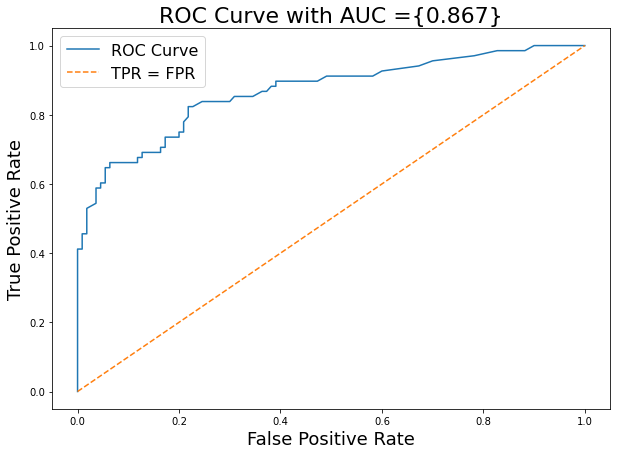

In [107]:
# Plotting ROC Curve
plt.figure(figsize = (10,7))

# ROC Curve
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='TPR = FPR',
         linestyle='--')

plt.title(f'ROC Curve with AUC =' + str({round((roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])),3)}), fontsize=22)
plt.ylabel('True Positive Rate', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

### Comments:
___
ROC Curves are frequently used to graphically depict the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate) at threshold various threshold settings. 

The Area Under ROC (AUROC) is measure of separability at various thresholds settings, and tells the extent to which a model is capable of distinguishing between classes. 

In this case, the ROC AUC Score is 0.867, which suggests that the model is exceptional at distinguishing between classes.

<a id='8'></a>

# 8. Kaggle Submission

In [108]:
# Scaling

test_cleaned = ss.transform(test_cleaned)

In [109]:
# Making Kaggle Prediction

kaggle_predictions = logreg.predict(test_cleaned).astype('int')
display(kaggle_predictions)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [110]:
# Creating DataFrame to store predictions

kaggle_submission = pd.DataFrame({'PassengerId':test['PassengerId'].values, 
                                  'Survived':kaggle_predictions})

In [111]:
# Viewing DataFrame

kaggle_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [112]:
# Saving DataFrame to CSV for submission

#kaggle_submission.to_csv('./datasets/kaggle_submission.csv', index=False)

## Kaggle Score

<img src='./images/kaggle_score.PNG'>

### Comments:
___
The score is fairly low, I'm guessing it is due to how I encoded the `Cabin` column. 

As a recap, I encoded it `1` for presence of Cabin accomodation, and `0` for absence of Cabin accomodation.

Perhaps there was more to it, such as the starting alphabets.

<a id='9'></a>

# 9. Credits
[Banner Image](#banner-image): <a href='https://demos.datasciencedojo.com/demo/titanic/'>Data Science Dojo</a>

In [113]:
# Getting the runtime of notebook

print(f"Run complete, total time taken \u2248 {time.time()-t0:.2f}s")

Run complete, total time taken ≈ 2.76s
